# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import os
import sys

sys.path.append("../../src/")

from utils import read_bb_data 

# Parsing files

In [2]:
result_files = [f for f in os.listdir("../../../energy_dataset/") if f.endswith("results")]
data_df = pd.DataFrame()

for file in result_files:
    file_df = read_bb_data(f"../../../energy_dataset/{file}/breaker_code.txt", f"../../../energy_dataset/{file}/breaker_final_energy.txt")
    file_df = file_df.drop(columns=["bb_name"])
    data_df = pd.concat([data_df, file_df], ignore_index=True)

Read file: 5500it [00:00, 1375099.67it/s]
Read file: 1007it [00:00, 671061.98it/s]
Read file: 23757it [00:00, 461300.24it/s]
Read file: 3281it [00:00, 935202.95it/s]
Read file: 65377it [00:00, 1556584.35it/s]
Read file: 10955it [00:00, 755696.27it/s]
Read file: 58770it [00:00, 1588155.78it/s]
Read file: 10348it [00:00, 1034850.33it/s]
Read file: 7827it [00:00, 1304905.69it/s]
Read file: 1281it [00:00, 638339.48it/s]
Read file: 307469it [00:00, 1556823.93it/s]
Read file: 55158it [00:00, 927066.40it/s]
Read file: 300354it [00:00, 1189674.42it/s]
Read file: 49541it [00:00, 750648.50it/s]
Read file: 117151it [00:00, 1572323.79it/s]
Read file: 19125it [00:00, 1159107.93it/s]
Read file: 32428it [00:00, 1544390.08it/s]
Read file: 3856it [00:00, 857223.52it/s]
Read file: 72921it [00:00, 1488182.92it/s]
Read file: 12771it [00:00, 1064475.20it/s]
Read file: 45306it [00:00, 1562427.64it/s]
Read file: 6559it [00:00, 937067.92it/s]
Read file: 45330it [00:00, 1563139.64it/s]
Read file: 6566it [00:00

In [3]:
print(f"Number of basic blocks: {len(data_df)}")

Number of basic blocks: 596329


In [4]:
data_df.head(5)

,bb,energy
0,"[movl $0x0, -0x2c(%rbp)]",0.842119
1,"[callq 0xfffffffffffffeff, pushq %rbp, mov %...",0.358601
2,"[popq %rbp, retq]",0.165508
3,"[movl $0x0, -0x1c(%rbp)]",0.842119
4,"[cmpl $0x64, -0x1c(%rbp), jnl 0x2c]",1.263179


# Analysis

Distribution based on number of instructions

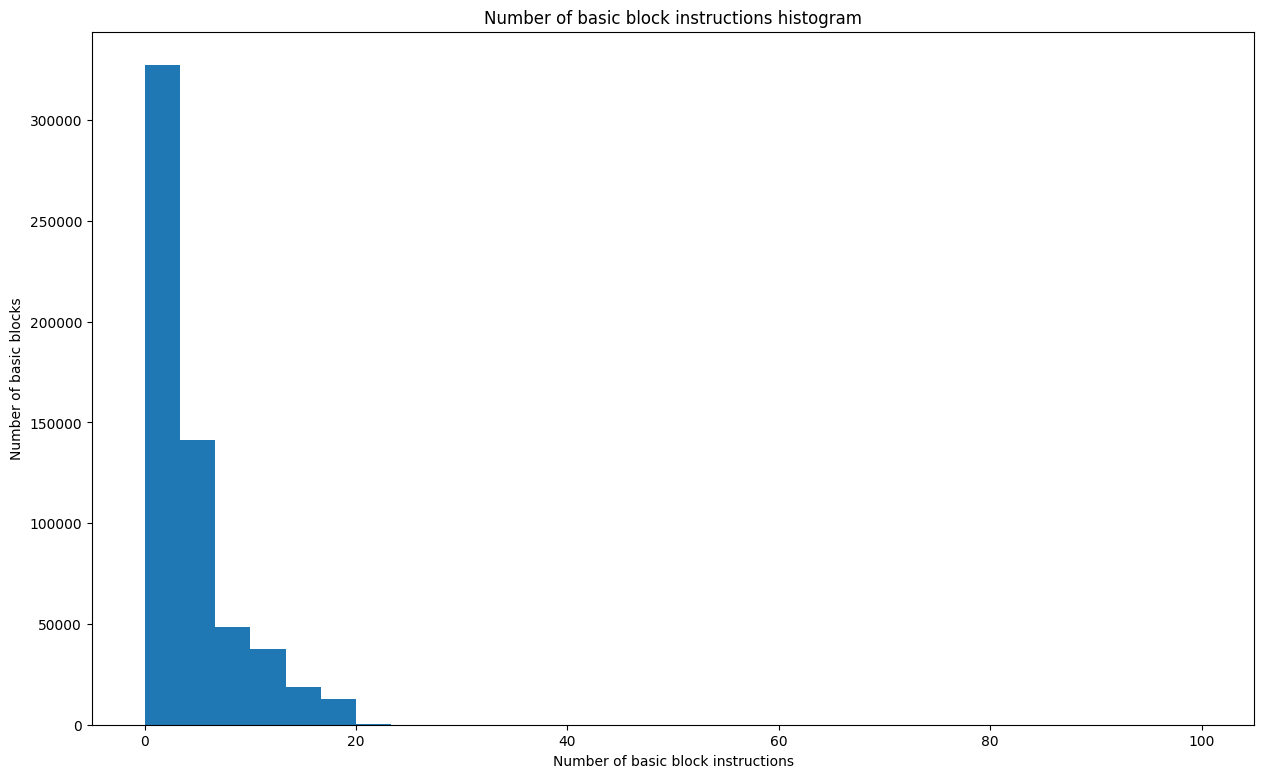

In [7]:
bb_instruction_num = data_df.bb.apply(lambda x: len(x)).values

plt.figure(figsize=(15,9))
plt.title("Number of basic block instructions histogram")
plt.xlabel("Number of basic block instructions")
plt.ylabel("Number of basic blocks")
plt.hist(bb_instruction_num, bins=30, range=(0,100))
plt.show()

In [6]:
MAX_INSTRUCTIONS = 20

data_df = data_df[data_df.bb.apply(lambda x: len(x)) <= MAX_INSTRUCTIONS]
data_df = data_df.reset_index(drop=True)
print(f"Number of data with bb up to {MAX_INSTRUCTIONS} instructions: {len(data_df)}")

Number of data with bb up to 20 instructions: 586441


Energy distribution

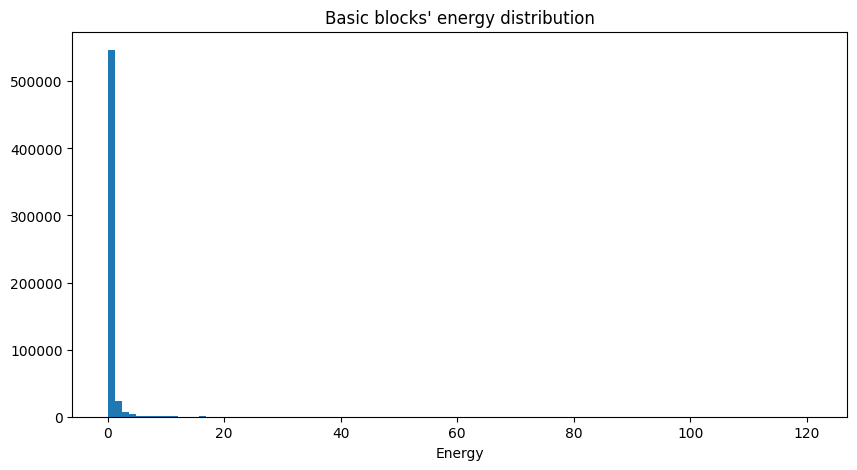

In [8]:
x_ticks = np.arange(data_df.energy.min(), data_df.energy.max(), 20)

plt.figure(figsize=(10, 5))
plt.hist(data_df.energy, bins=100)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.xticks(x_ticks)
plt.show()

In [9]:
outlier_bb = data_df.loc[data_df.energy.idxmax()]
outlier_bb.bb

['imull  $0x3, -0xc(%rbp), %eax',
 'cdq',
 'mov $0x5, %ecx',
 'idiv %ecx',
 'movsxdl  -0xc(%rbp), %rdx',
 'movl  %eax, -0x4d0(%rbp,%rdx,4)',
 'movsxdl  -0xc(%rbp), %rax',
 'movl  -0x4d0(%rbp,%rax,4), %eax',
 'cdq',
 'idiv %ecx',
 'cmp $0x2, %edx',
 'jle 0x20']

We remove the outliers and data with 0 energy

In [10]:
perc = len(data_df[data_df.energy < 10]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 10: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 5]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 5: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 2]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 2: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 1]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 1: {round(perc, 2)}%")

perc = len(data_df[data_df.energy < 0.5]) * 100 / len(data_df)
print(f"Percentage of basic blocks with energy lower than 0.5: {round(perc, 2)}%")

perc = len(data_df[data_df.energy == 0.0]) * 100/ len(data_df)
print(f"Percentage of basic blocks with 0 energy: {round(perc, 2)}%")

Percentage of basic blocks with energy lower than 10: 99.74%
Percentage of basic blocks with energy lower than 5: 99.19%
Percentage of basic blocks with energy lower than 2: 96.35%
Percentage of basic blocks with energy lower than 1: 91.5%
Percentage of basic blocks with energy lower than 0.5: 85.07%
Percentage of basic blocks with 0 energy: 39.77%


In [11]:
data_df = data_df[data_df.energy > 0.0]
data_df = data_df[data_df.energy < 10.0]

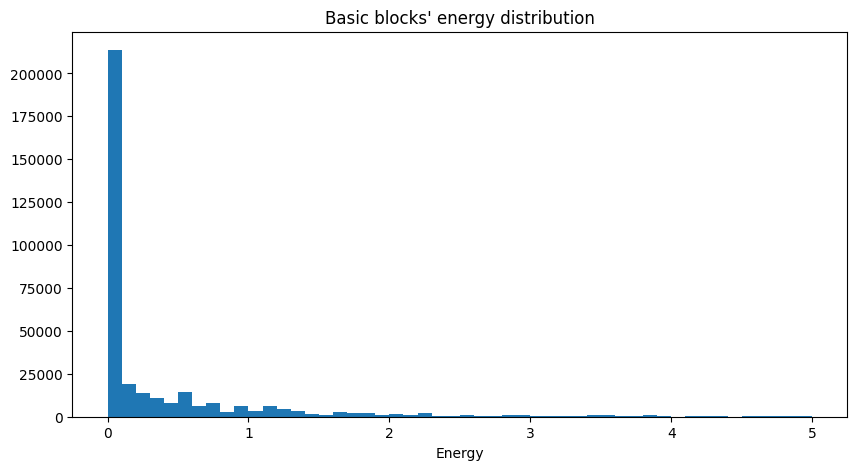

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(data_df.energy, range=(0, 5), bins=50)
plt.title("Basic blocks' energy distribution")
plt.xlabel("Energy")
plt.show()

In [13]:
median = np.median(data_df.energy.values)
std = np.std(data_df.energy.values)

print(f"Labels' median: {median}, Labels' std: {std}")

Labels' median: 0.00036325527449820644, Labels' std: 0.9681833086059627


In [14]:
grouped_df = data_df.groupby(data_df["bb"].map(tuple))["energy"].apply(list).reset_index()
grouped_df.head(5)

,bb,energy
0,"(add $0x1, %esi, movl %esi, (%rax), cmpl %es...","[1.052697559160445, 1.5276753937910126, 0.5167..."
1,"(add $0x1, %r10, mov %rbx, %rdx, movsxb 0x1(%...","[0.692592486591099, 0.692592486591099, 0.69259..."
2,"(add $0x1, %r15, movq 0x28(%r12), %rax, movzx...","[1.1483980499316333, 1.1483980499316333, 1.148..."
3,"(add $0x1, %r9d, cmpq $0x0, -0x500(%rbp), jz ...","[0.17353786933730966, 0.17353786933730966, 0.1..."
4,"(add $0x10, %rsp, popq %rbx, popq %r14, popq...","[0.27270269841995887, 1.052697559160445, 1.052..."


In [15]:
multiple_energies_df = grouped_df[grouped_df.energy.map(len) > 1]
perc = len(multiple_energies_df) * 100 / len(grouped_df)
print(f"Number of basic blocks that appear multiple times: {round(perc, 2)}%")

Number of basic blocks that appear multiple times: 72.29%


# Energy distribution per program

Read file: 5500it [00:00, 1100447.07it/s]
Read file: 1007it [00:00, 670316.48it/s]


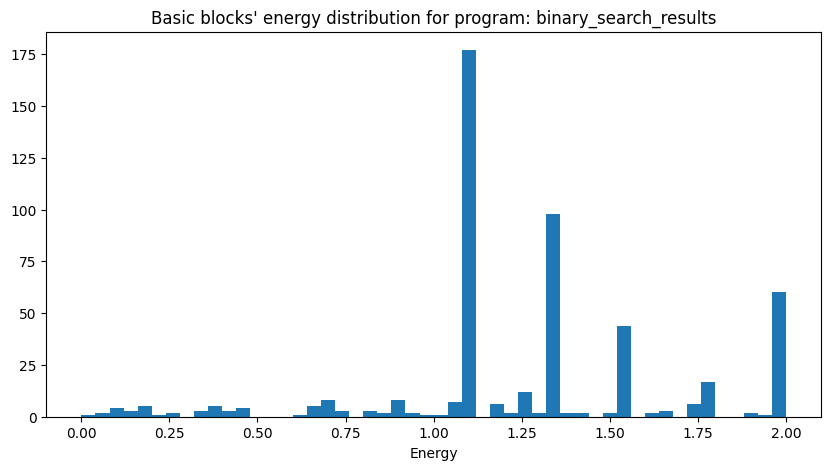

Read file: 23757it [00:00, 1584645.28it/s]
Read file: 3281it [00:00, 820700.82it/s]


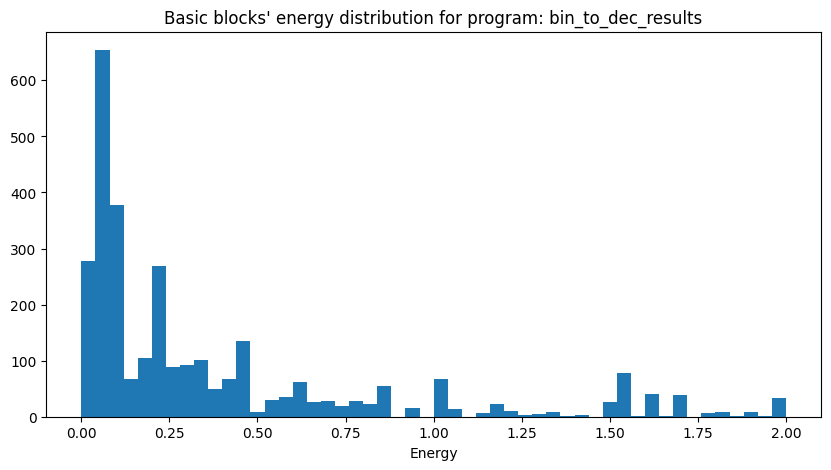

Read file: 65377it [00:00, 1539499.39it/s]
Read file: 10955it [00:00, 913091.70it/s]


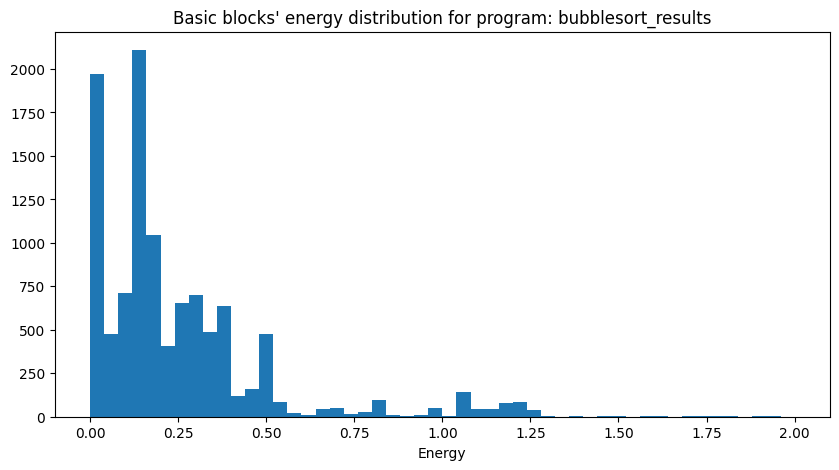

Read file: 58770it [00:00, 1545382.00it/s]
Read file: 10348it [00:00, 1035294.65it/s]


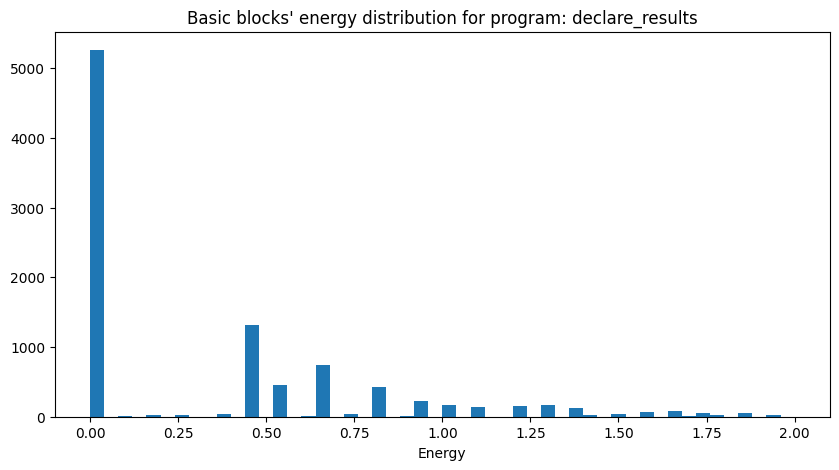

Read file: 7827it [00:00, 1423132.37it/s]
Read file: 1281it [00:00, 513416.48it/s]


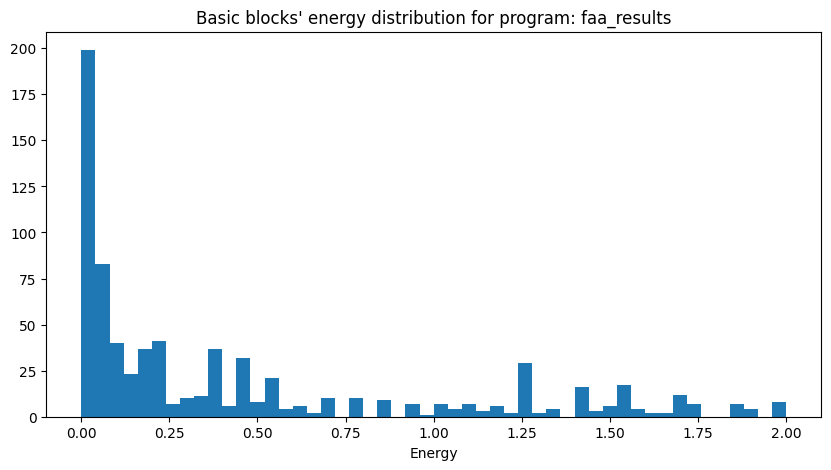

Read file: 307469it [00:00, 800698.40it/s] 
Read file: 55158it [00:00, 919235.13it/s]


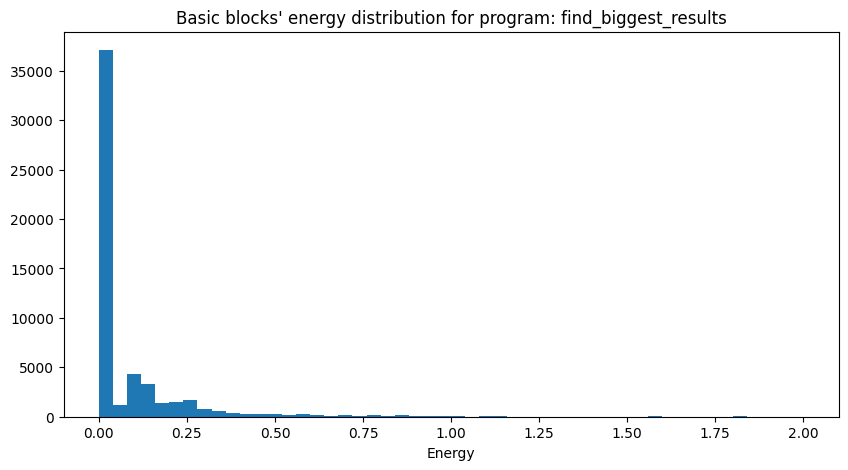

Read file: 300354it [00:00, 1589123.40it/s]
Read file: 49541it [00:00, 805674.95it/s]


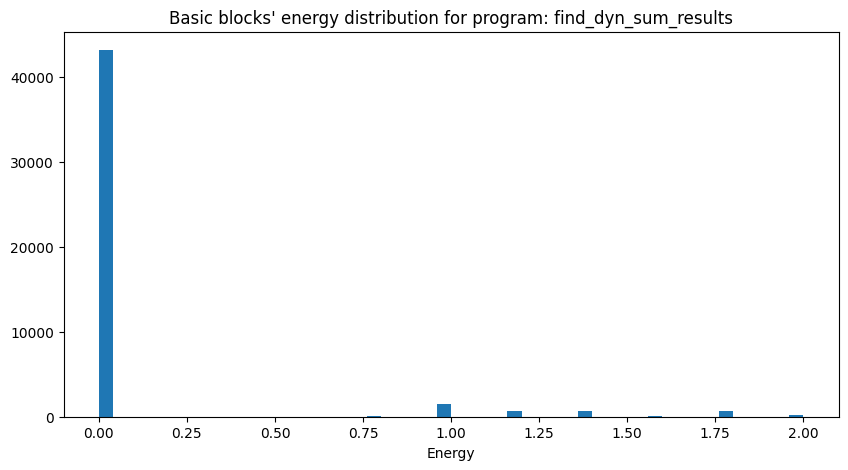

Read file: 117151it [00:00, 1541461.03it/s]
Read file: 19125it [00:00, 1125160.45it/s]


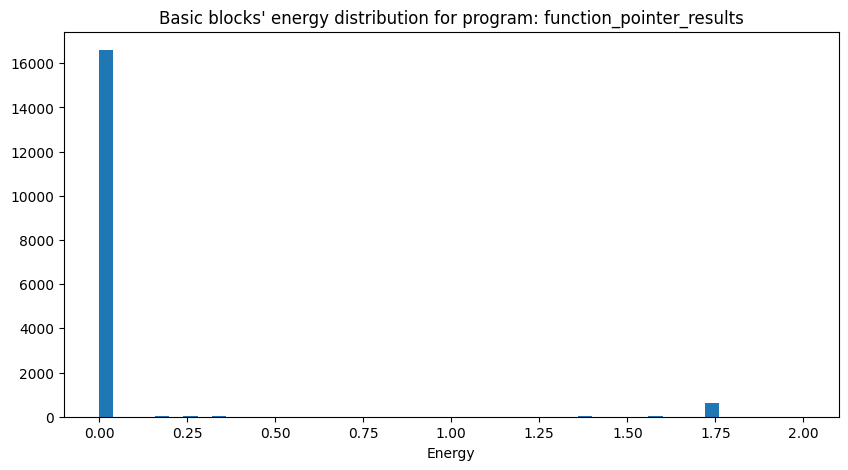

Read file: 32428it [00:00, 1544477.77it/s]
Read file: 3856it [00:00, 856724.03it/s]


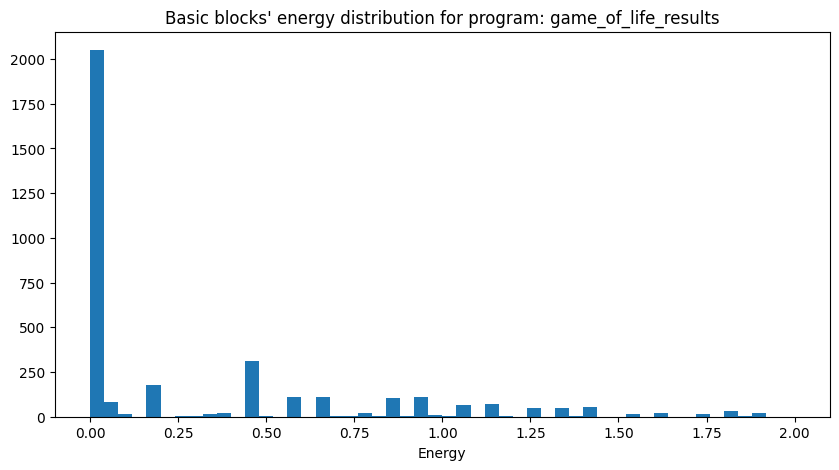

Read file: 72921it [00:00, 1585329.38it/s]
Read file: 12771it [00:00, 1110740.41it/s]


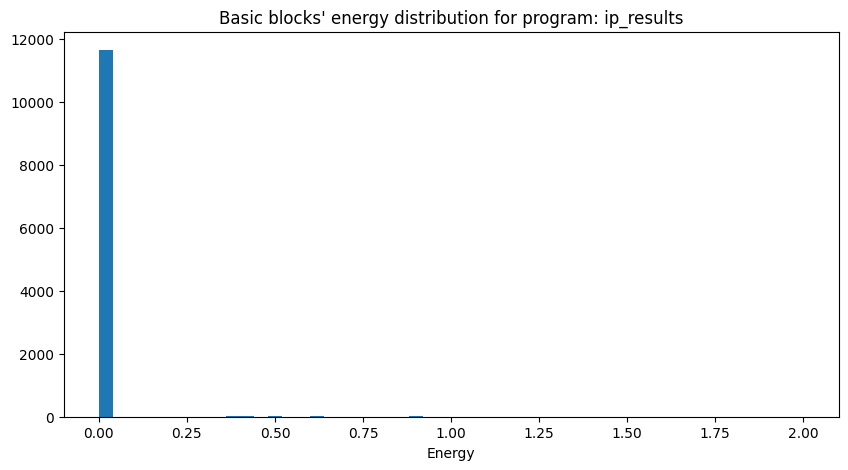

Read file: 45306it [00:00, 1535386.72it/s]
Read file: 6559it [00:00, 820178.88it/s]


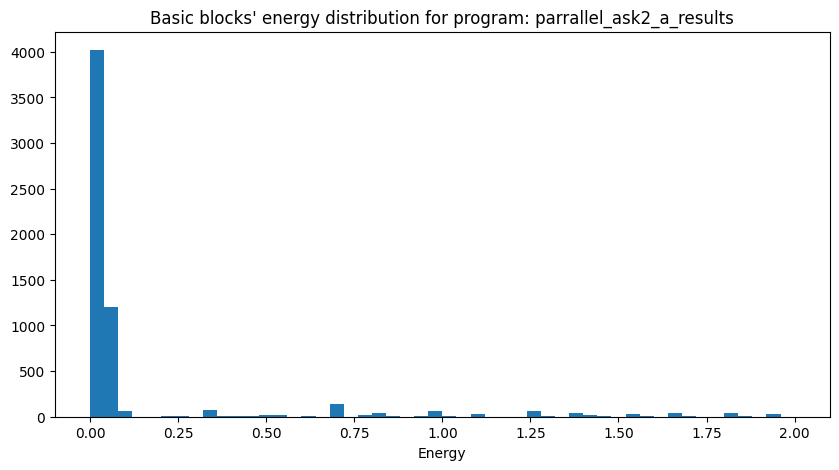

Read file: 45330it [00:00, 985388.74it/s]
Read file: 6566it [00:00, 875307.51it/s]


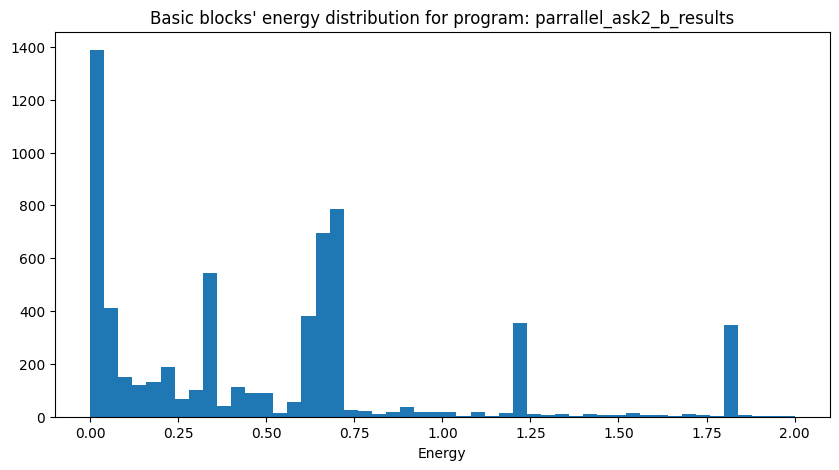

Read file: 87915it [00:00, 1528902.51it/s]
Read file: 14909it [00:00, 993989.58it/s]


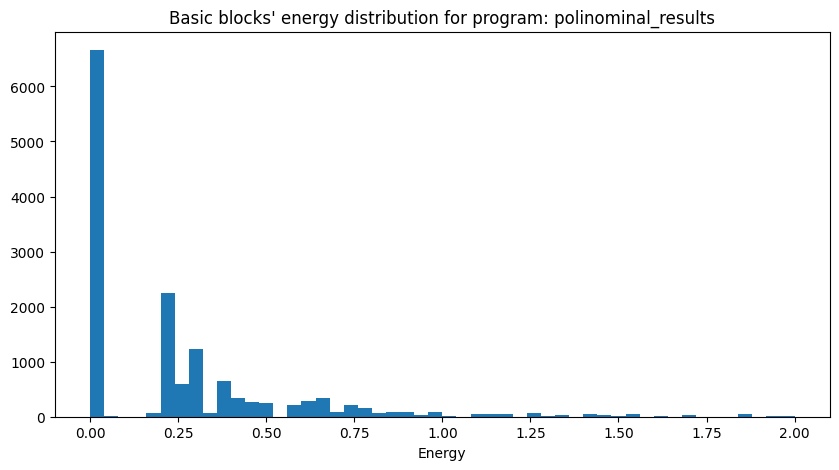

Read file: 96861it [00:00, 1600897.18it/s]
Read file: 15598it [00:00, 944923.94it/s]


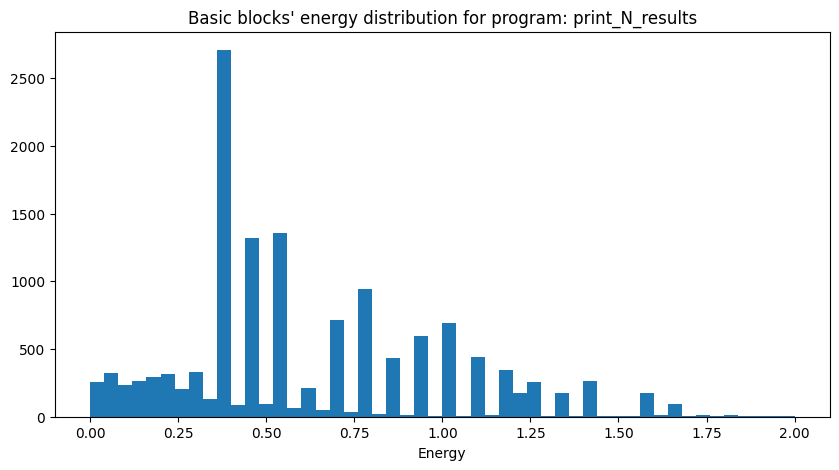

Read file: 112856it [00:00, 1455971.57it/s]
Read file: 17381it [00:00, 914844.30it/s]


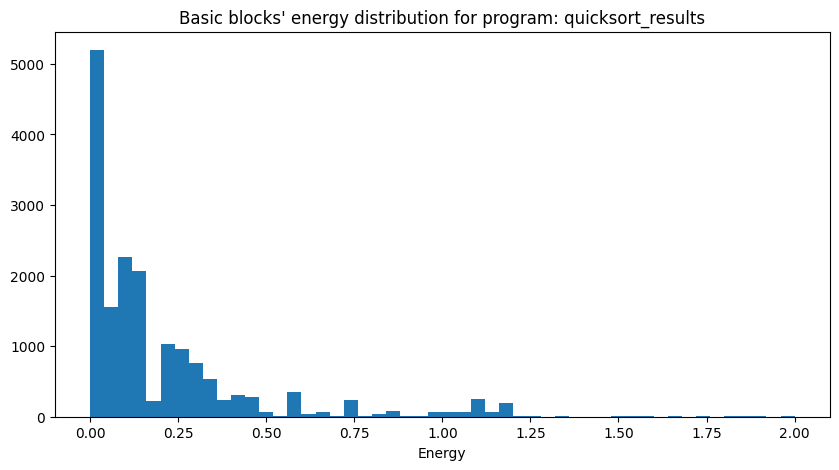

Read file: 87125it [00:00, 341667.79it/s]
Read file: 13874it [00:00, 956252.24it/s]


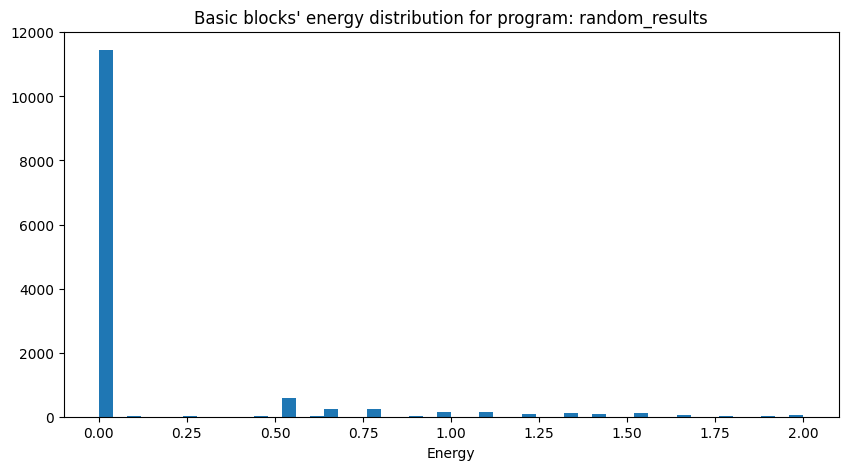

Read file: 37223it [00:00, 1553045.70it/s]
Read file: 6354it [00:00, 907718.24it/s]


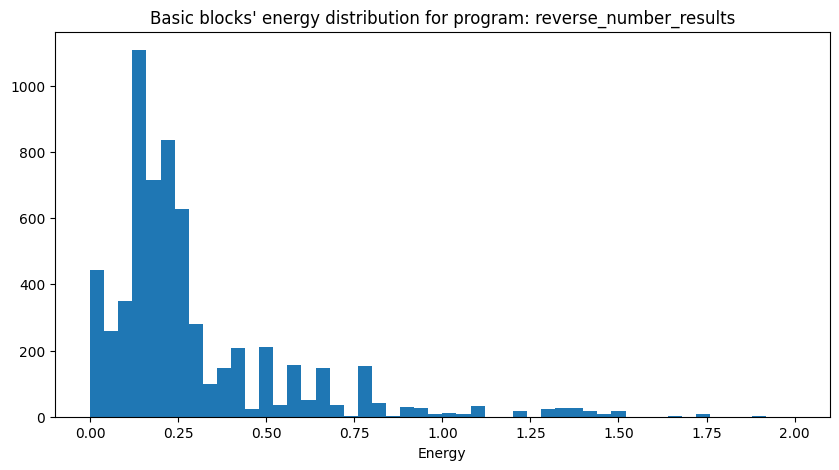

Read file: 43378it [00:00, 1577414.09it/s]
Read file: 7697it [00:00, 905163.40it/s]


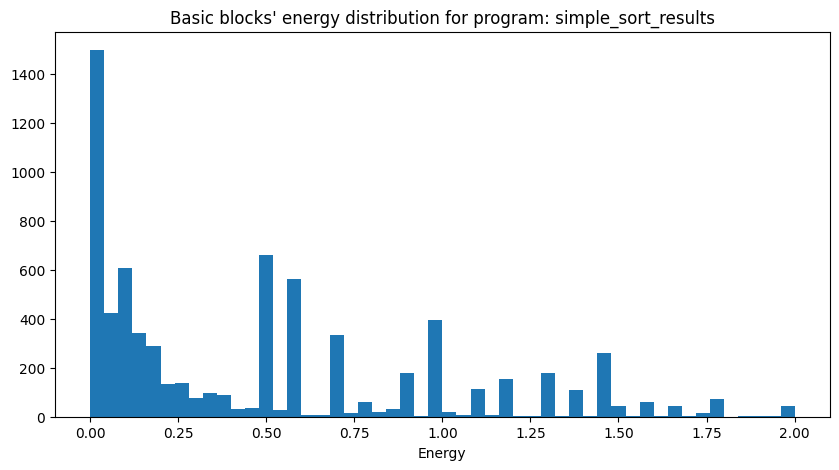

Read file: 15564it [00:00, 1197888.79it/s]
Read file: 2626it [00:00, 750800.43it/s]


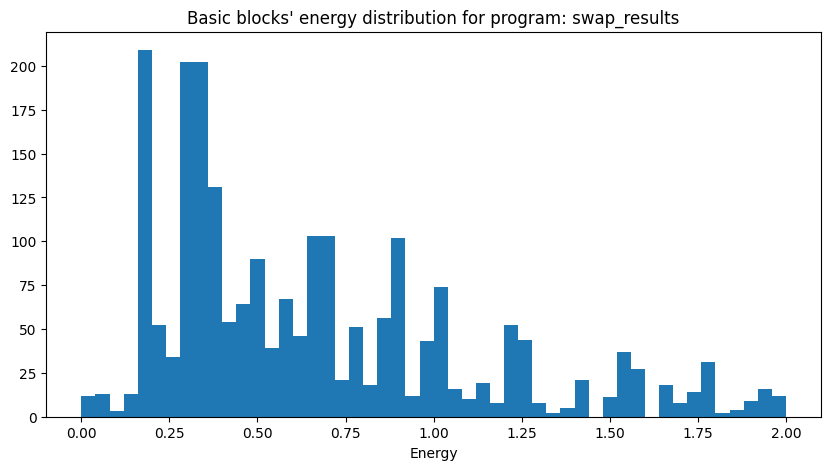

Read file: 1267388it [00:00, 1317443.13it/s]
Read file: 208473it [00:00, 947597.23it/s]


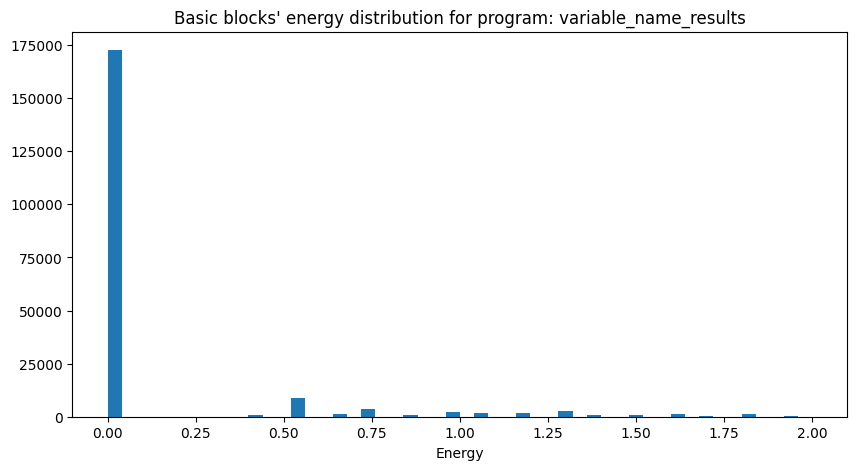

Read file: 946734it [00:00, 1663793.13it/s]
Read file: 128969it [00:00, 1146671.06it/s]


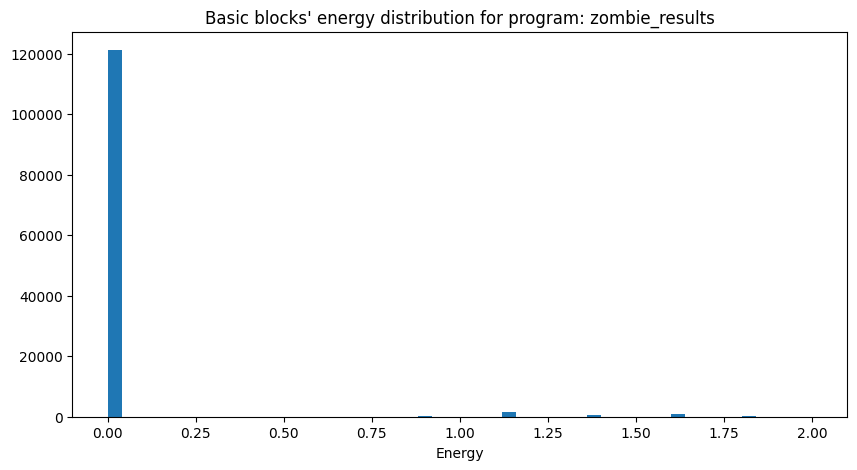

In [18]:
result_files = [f for f in os.listdir("../../../energy_dataset/") if f.endswith("results")]

for file in result_files:
    file_df = read_bb_data(f"../../../energy_dataset/{file}/breaker_code.txt", f"../../../energy_dataset/{file}/breaker_final_energy.txt")
    plt.figure(figsize=(10, 5))
    plt.hist(file_df.energy, range=(0, 2), bins=50)
    plt.title(f"Basic blocks' energy distribution for program: {file}")
    plt.xlabel("Energy")
    plt.show()